In [1]:
import scanpy as sc
import muon
import anndata
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

['default', 'despine']


In [2]:
endocrine_celltypes = [
    "Ngn3 low",
    "Ngn3 high",
    "Fev+",
    "Fev+ Alpha",
    "Fev+ Beta",
    "Fev+ Delta",
    "Eps. progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
]

In [3]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/sparse_monge"

In [4]:
adata_15 = anndata.read(os.path.join(output_dir, "adata_15_with_sparse_mask_10_scaling.h5ad"))

In [5]:
adata_15.var["sparse_counts"] = adata_15.layers["sparse_mask"].sum(axis=0)
adata_15.obs["sparse_counts"] = adata_15.layers["sparse_mask"].sum(axis=1)

In [6]:
highest_var = adata_15.var["sparse_counts"].sort_values()[-10:]/len(adata_15)

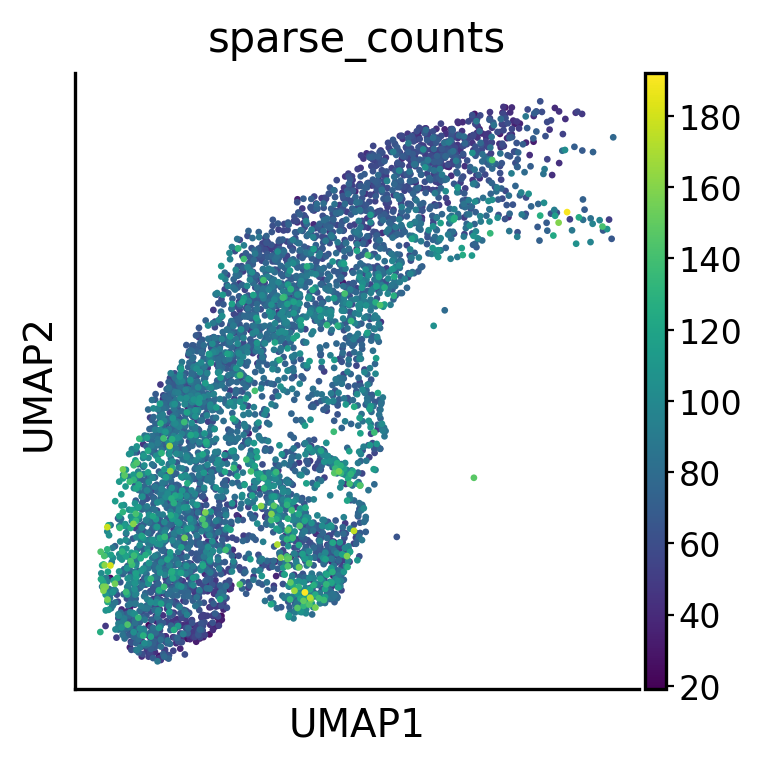

In [7]:
sc.pl.umap(adata_15, color='sparse_counts')

In [8]:
res_dict = {}
res_dict_2 = {}
for cell_type in endocrine_celltypes:
    adata_tmp = adata_15[adata_15.obs["cell_type"]==cell_type]
    adata_tmp.var["sparse_counts"] = adata_tmp.layers["sparse_mask"].sum(axis=0)
    adata_tmp.obs["sparse_counts"] = adata_tmp.layers["sparse_mask"].sum(axis=1)
    res_dict[cell_type] = adata_tmp.var["sparse_counts"].sort_values()[-5:]/len(adata_tmp)
    res_dict_2[cell_type] = (adata_tmp.var["sparse_counts"]/len(adata_tmp)).var()

/tmp/ipykernel_2192575/2226181577.py:5: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_tmp.var["sparse_counts"] = adata_tmp.layers["sparse_mask"].sum(axis=0)


In [9]:
df = pd.DataFrame.from_dict(res_dict)

In [10]:
res_dict

{'Ngn3 low': Vim        0.329392
 Sparc      0.369932
 Mdk        0.385135
 Rpl35      0.606419
 Gm10076    0.645270
 Name: sparse_counts, dtype: float64,
 'Ngn3 high': Mfap4      0.338885
 Rpl35      0.362056
 Igfbpl1    0.365677
 Mdk        0.430123
 Gm10076    0.442433
 Name: sparse_counts, dtype: float64,
 'Fev+': Vim        0.250420
 Gm10076    0.272269
 Rbp4       0.280672
 Bex2       0.302521
 Ffar2      0.326050
 Name: sparse_counts, dtype: float64,
 'Fev+ Alpha': Cldn4      0.302158
 Ffar2      0.345324
 Gm10076    0.359712
 Arx        0.453237
 Pcsk2      0.460432
 Name: sparse_counts, dtype: float64,
 'Fev+ Beta': Ambp       0.134931
 Mafb       0.151324
 Rpl35      0.190416
 Pdx1       0.206810
 Gm10076    0.278689
 Name: sparse_counts, dtype: float64,
 'Fev+ Delta': Isl1       0.371212
 Gm10076    0.393939
 Cck        0.416667
 Mdk        0.484848
 Cdkn1a     0.583333
 Name: sparse_counts, dtype: float64,
 'Eps. progenitors': Btbd17     0.404040
 Rpl35      0.414141
 Tmsb4

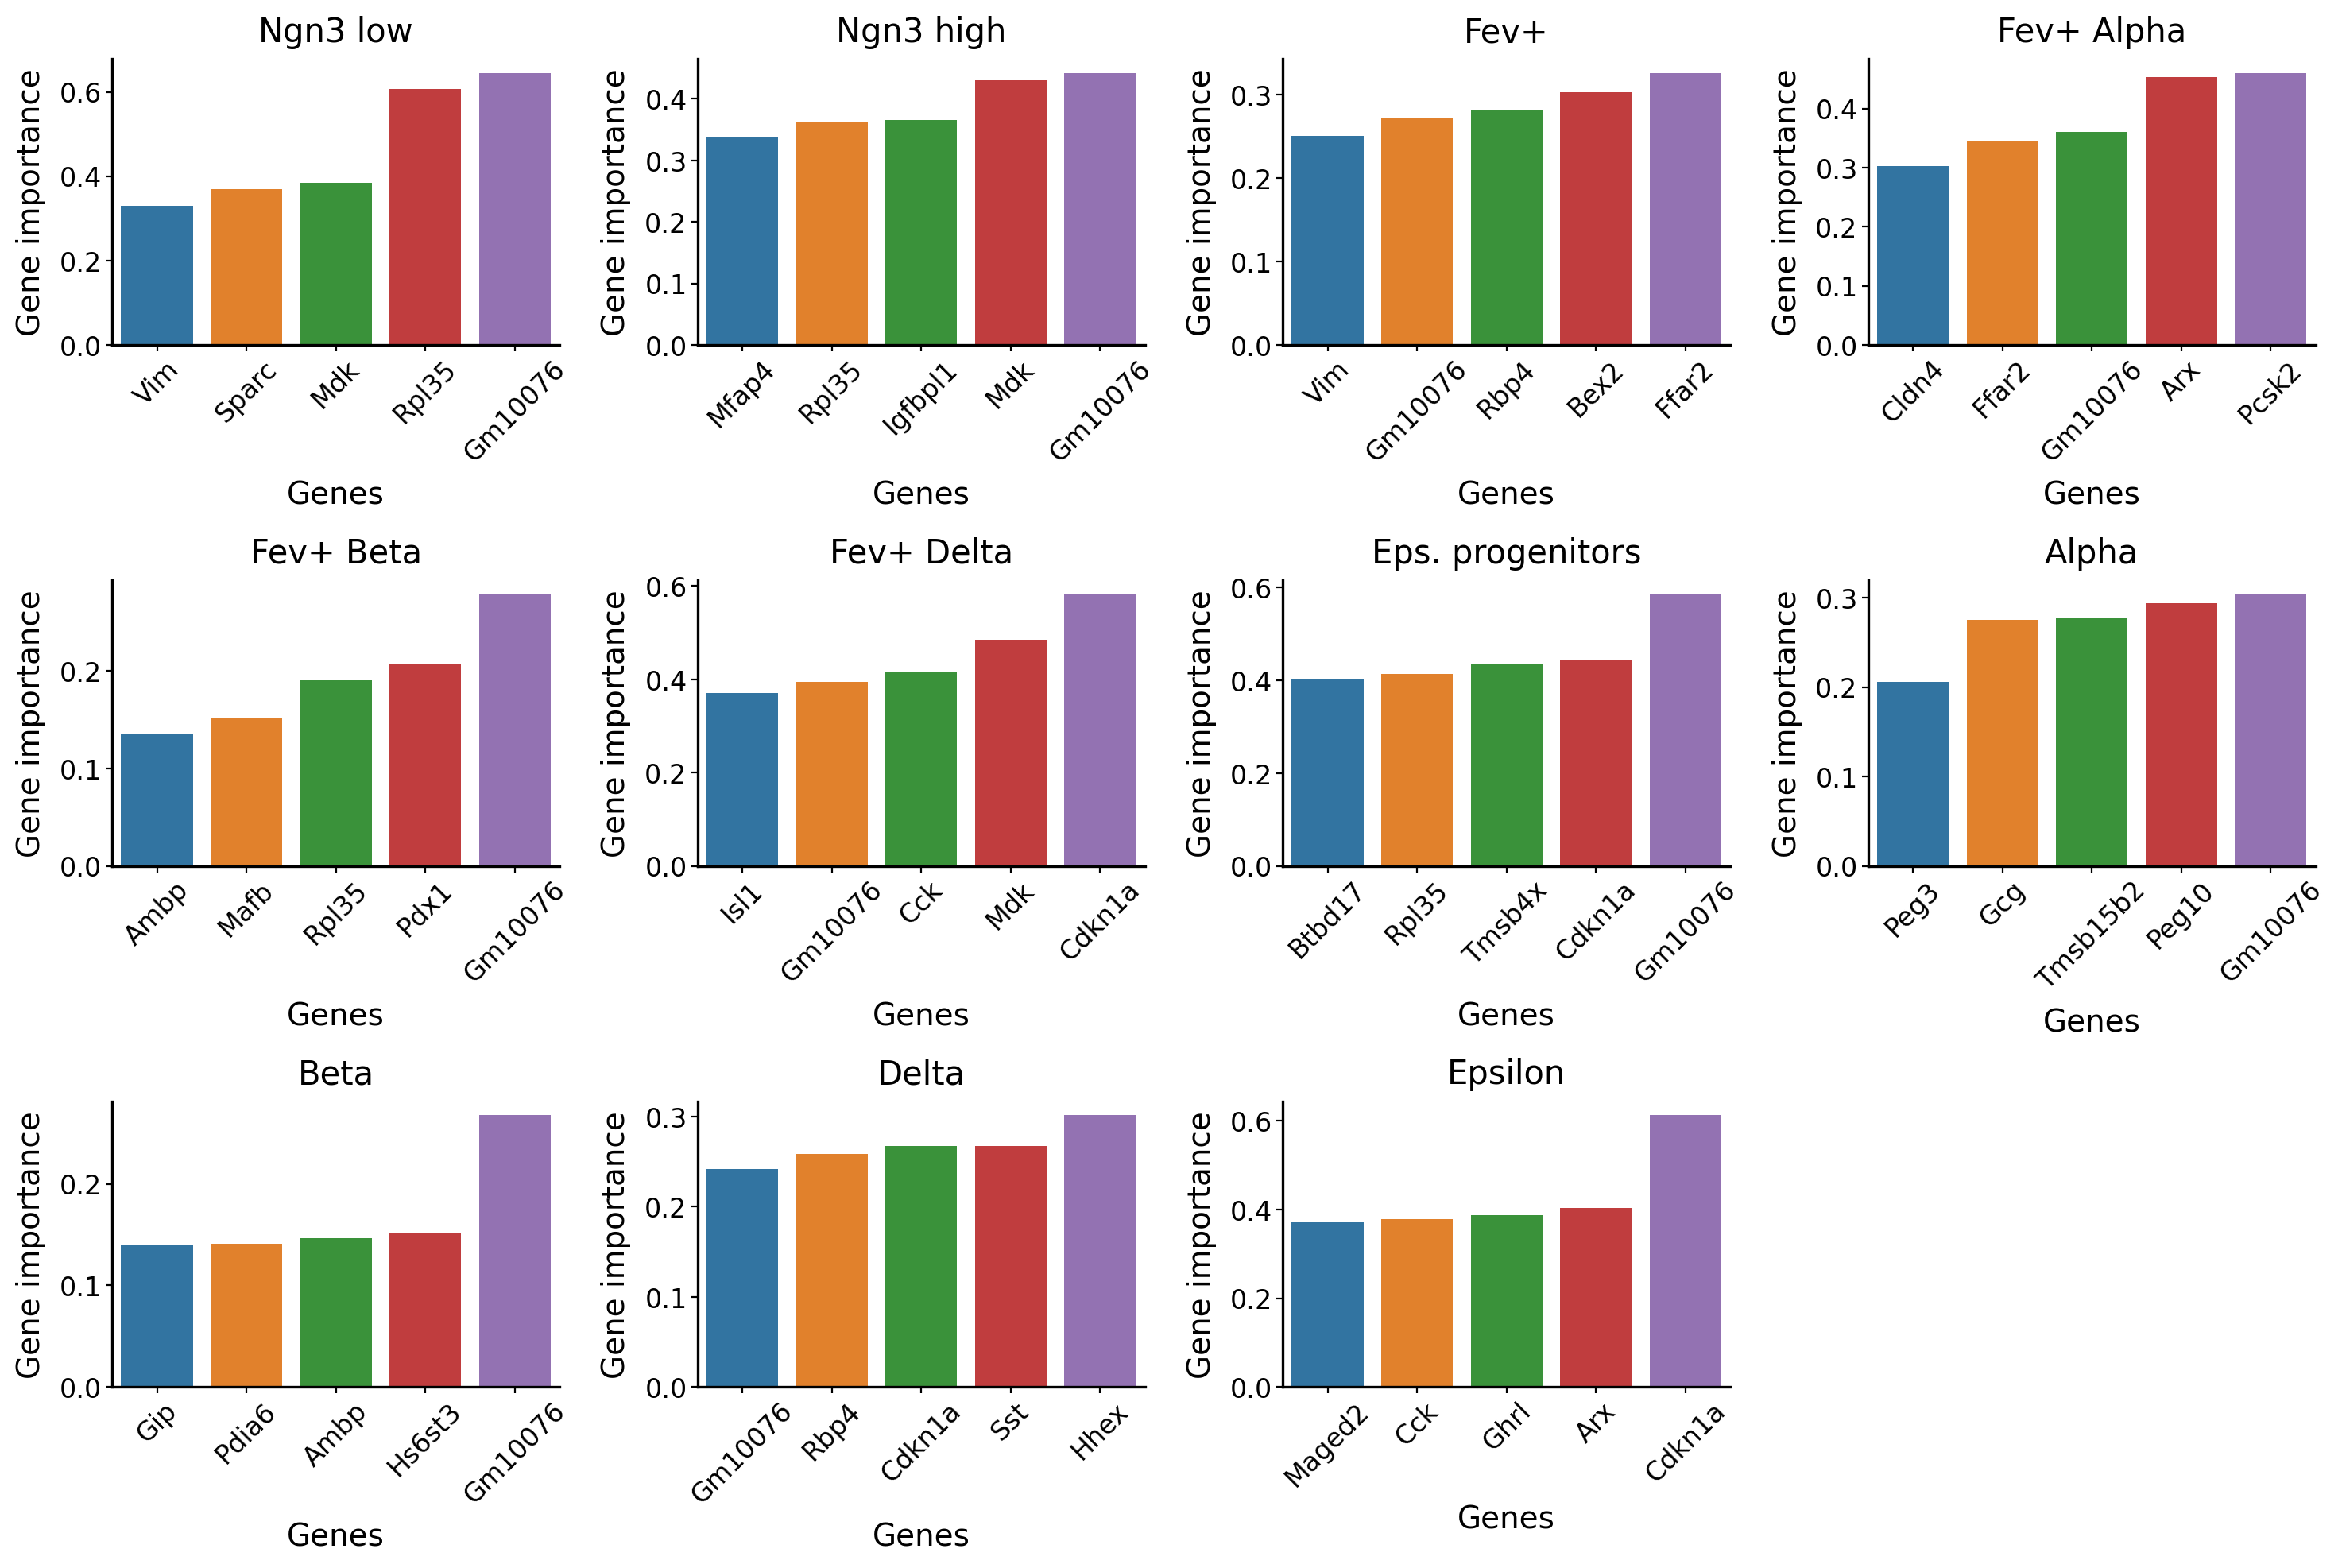

In [26]:
import numpy as np
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten axes if necessary (in case num_rows or num_cols is 1)
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Iterate over each cell type and create a bar plot in the corresponding subplot
for i, (cell_type, data) in enumerate(res_dict.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[i]
    sns.barplot(x=list(data.index), y=list(data.values), ax=ax)
    ax.set_title(f'{cell_type}')
    ax.set_xlabel('Genes')
    ax.set_ylabel('Gene importance')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove extra subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
res_dict_2


{'Ngn3 low': 0.0016157263766625007,
 'Ngn3 high': 0.0012935649941397524,
 'Fev+': 0.0009062497103002809,
 'Fev+ Alpha': 0.00143127534378192,
 'Fev+ Beta': 0.00042194093689412385,
 'Fev+ Delta': 0.0016166644571097477,
 'Eps. progenitors': 0.0021851061675179674,
 'Alpha': 0.0005350551647950598,
 'Beta': 0.0003501520541576097,
 'Delta': 0.0009221584052218243,
 'Epsilon': 0.001928359933214778}

In [13]:
df_var = pd.DataFrame.from_dict(res_dict_2, orient="index")

In [14]:
df_var = df_var.reset_index()

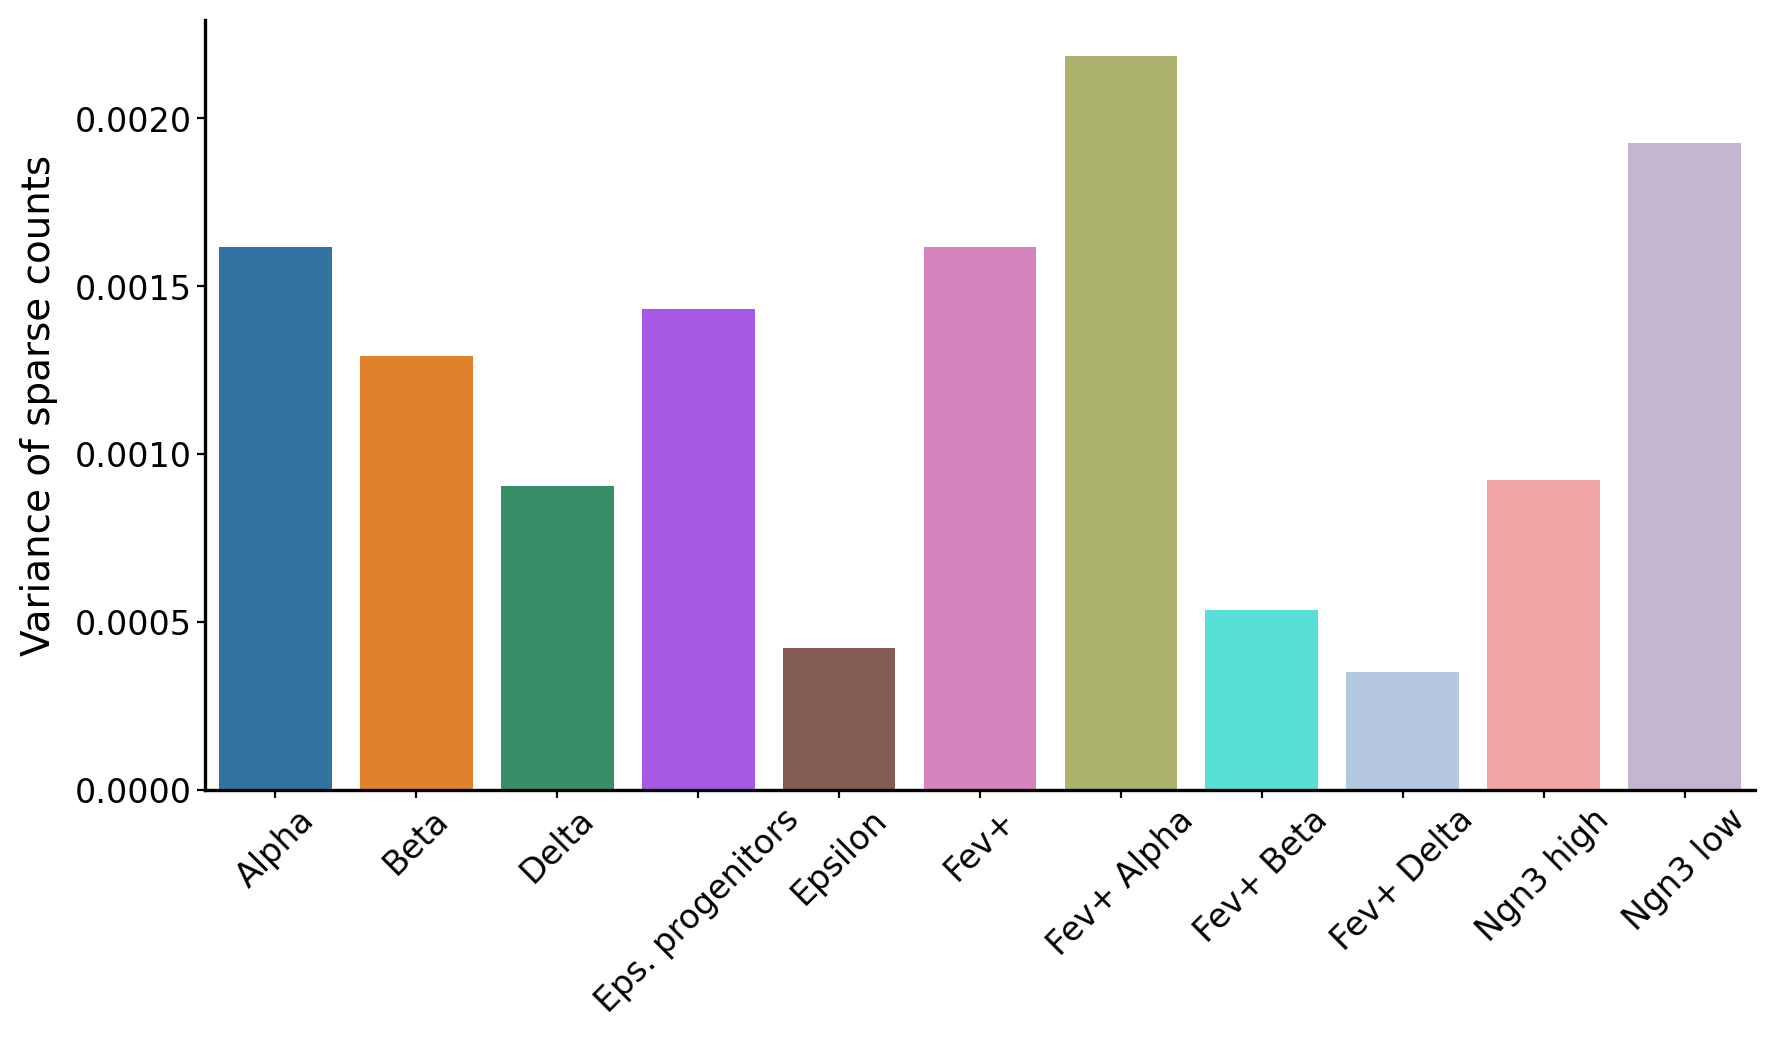

In [15]:

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.barplot(df_var, x=adata_15.obs["cell_type"].cat.categories, y=0,  ax=ax, palette=adata_15.uns["cell_type_colors"])
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Variance of sparse counts')
plt.show()


In [16]:
sc.pp.pca(adata_15)
sc.pp.neighbors(adata_15, use_rep="X_pca", n_neighbors=50)

In [17]:
from tqdm import tqdm
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

js = []
for i in tqdm(range(len(adata_15))):
    neighbors = (adata_15.obsp["distances"][i]>0).T
    adata_cell = adata_15[i]
    adata_tmp = adata_15[list(neighbors.A[:,0])]   
    adata_tmp.var["sparse_counts"] = adata_tmp.layers["sparse_mask"].sum(axis=0)
    genes_neighborhood = adata_tmp.var["sparse_counts"][adata_tmp.var["sparse_counts"]>0].index
    genes_cell = adata_cell.var["sparse_counts"][adata_cell.var["sparse_counts"]>0].index
    js.append(jaccard_similarity(set(genes_neighborhood), set(genes_cell)))
    
    

  0%|          | 0/5119 [00:00<?, ?it/s]/tmp/ipykernel_2192575/2977009877.py:12: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_tmp.var["sparse_counts"] = adata_tmp.layers["sparse_mask"].sum(axis=0)
100%|██████████| 5119/5119 [02:02<00:00, 41.74it/s]


In [18]:
adata_15.obs["js_inv"] = 1-np.asarray(js)

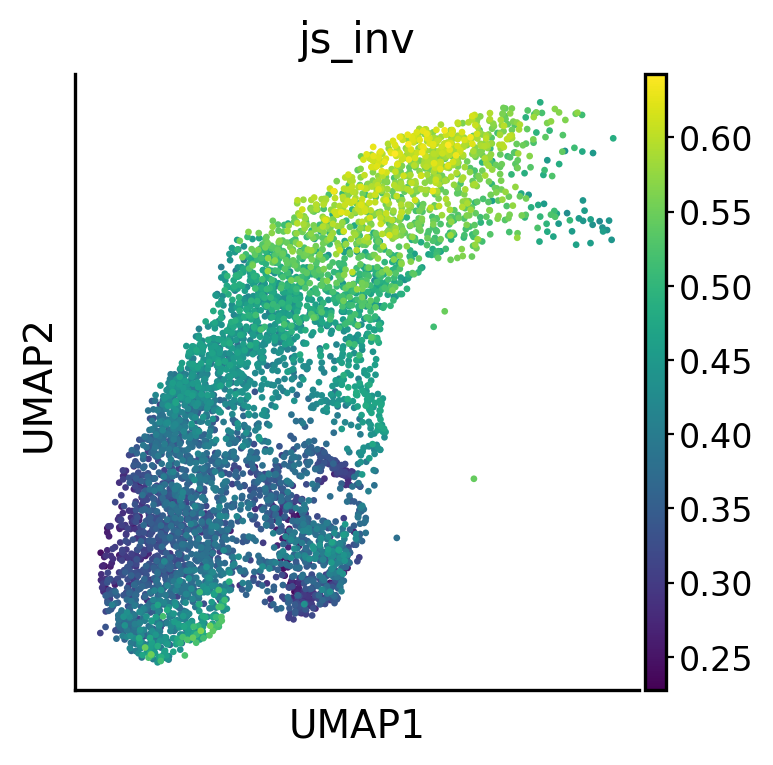

In [19]:
sc.pl.umap(adata_15, color="js_inv")

In [20]:
mean_dissimilarity = adata_15.obs[["cell_type", "js_inv"]].groupby("cell_type").mean()

In [21]:
mean_dissimilarity


,js_inv
cell_type,
Alpha,0.349279
Beta,0.386553
Delta,0.328553
Eps. progenitors,0.504243
Epsilon,0.414935
Fev+,0.396376
Fev+ Alpha,0.352146
Fev+ Beta,0.347484
Fev+ Delta,0.451017


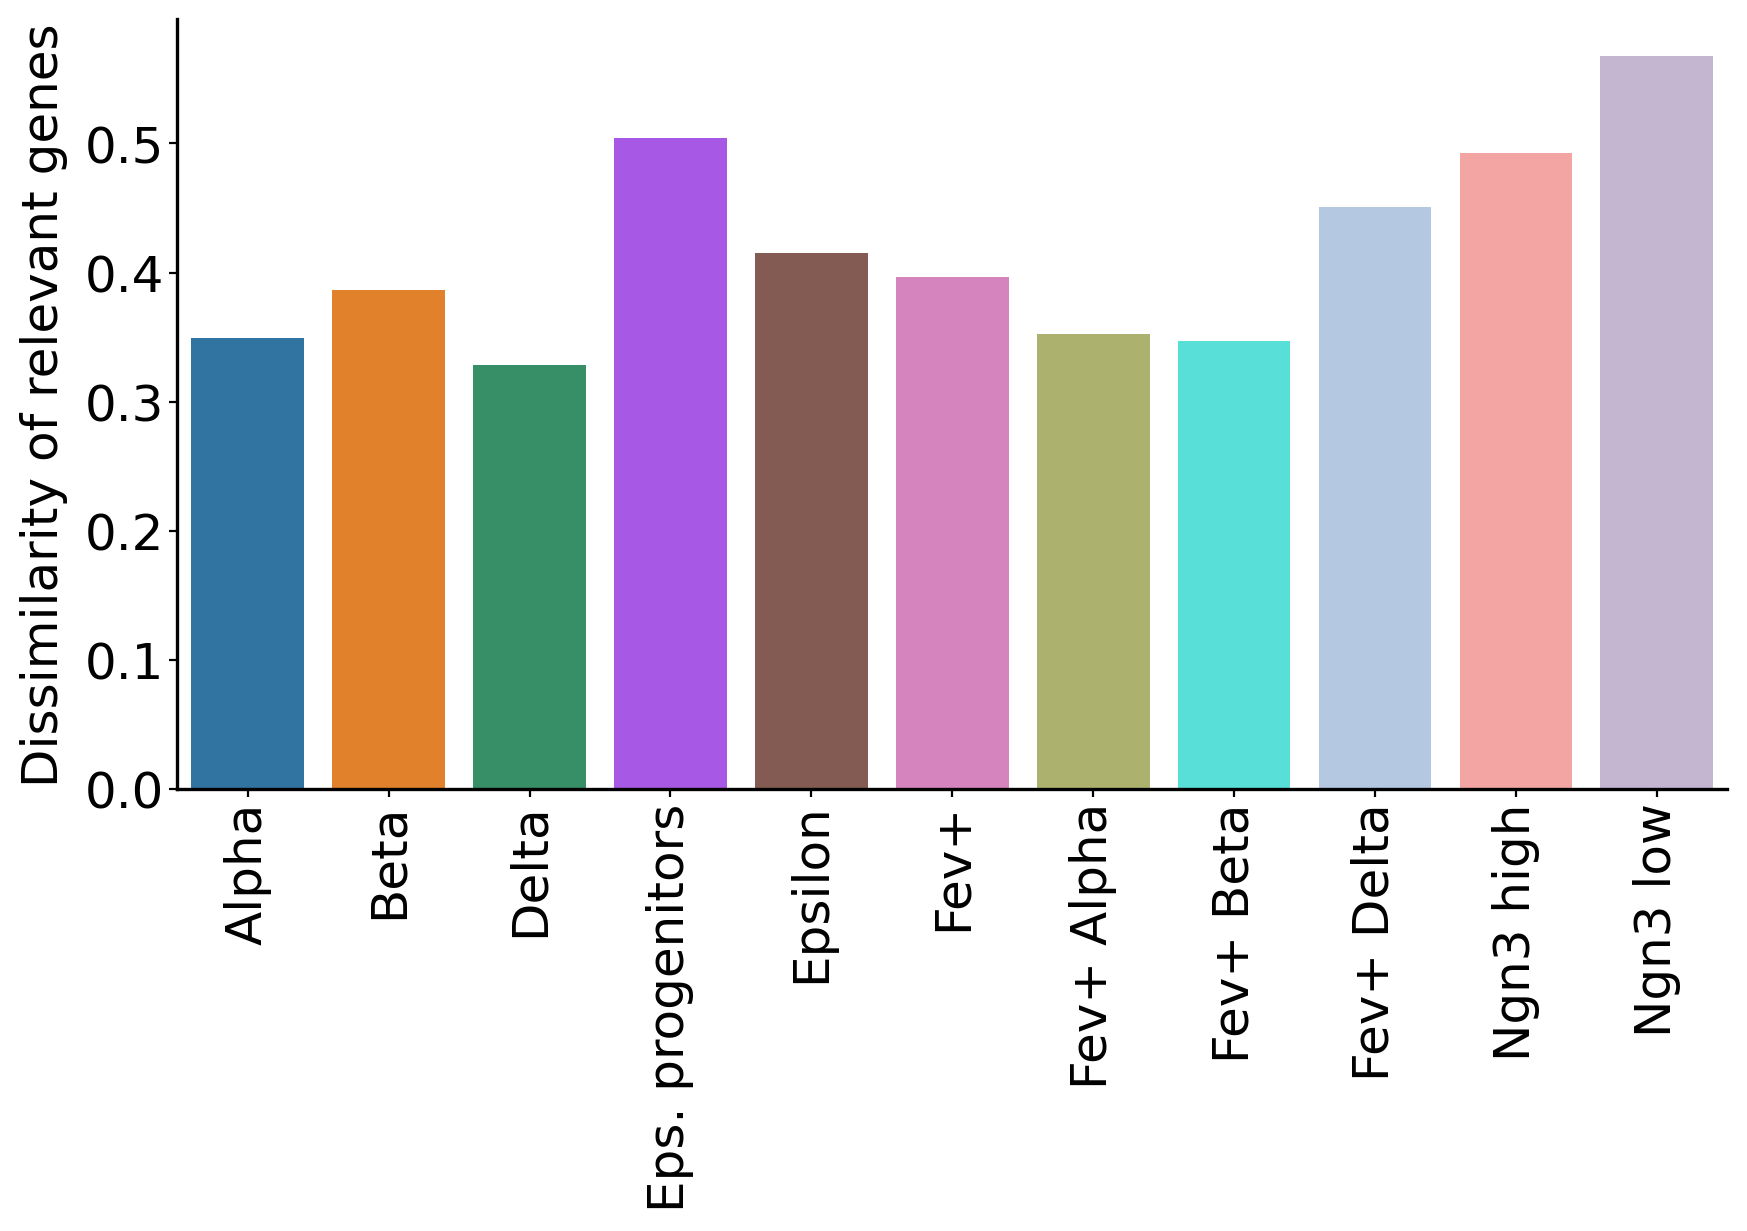

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.barplot(mean_dissimilarity, x=adata_15.obs["cell_type"].cat.categories, y="js_inv",  ax=ax, palette=adata_15.uns["cell_type_colors"])
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Dissimilarity of relevant genes', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [34]:
adata_15

AnnData object with n_obs × n_vars = 5119 × 2551
    obs: 'sample', 'name', 'stage', 'stage_num', 'int_id', 'seq_id_gex_id', 'seq_id_atac', 'reporter', 'experiment_batch', 'sequencing_batch', 'n_counts', 'log_counts', 'n_counts_rank', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'final_doublets', 'final_doublets_cat', 'doublet_calls', 'batch', 'size_factors', 'leiden', 'leiden_05_rna', 'leiden_05_atac', 'leiden_1_rna', 'leiden_1_atac', 'leiden_combined', 'leiden_gex_graph', 'leiden_ATAC_graph', 'leiden_wnn_graph', 'cell_type', 'cell_type_refined', 'S_score', 'G2M_score', 'phase', 'proliferation', 'time', 'sparse_counts', 'js_inv'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'ambient_genes_E14_5-0', 'is_ambient_E14_5-0', 'n_counts-0', 'n_counts-1', 'ambient_genes_E15_5-1', 'is_ambient_E15_5-1', 'n_counts-2', 'ambient_genes_NVF_E15-5_Rep2-2', 'is_ambient_NVF_E15-5_Rep2-2', 'n_counts-3', 'ambient_genes_NVF_E16-5_Rep1-3', 'is_ambient_NVF_E16-5_Rep1-3', 'is_ambi